In [1]:
from tensorflow import keras

base_model = keras.applications.ResNet50(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [2]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [3]:
base_model.trainable = False


In [4]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [8]:
!unzip helmet-ds.zip

Archive:  helmet-ds.zip
   creating: helmet-ds/
   creating: helmet-ds/valid/
   creating: helmet-ds/valid/with_helmet/
  inflating: helmet-ds/valid/with_helmet/new45.jpg  
  inflating: helmet-ds/valid/with_helmet/new47.jpg  
  inflating: helmet-ds/valid/with_helmet/new48.jpg  
  inflating: helmet-ds/valid/with_helmet/new54.jpg  
  inflating: helmet-ds/valid/with_helmet/new55.jpg  
  inflating: helmet-ds/valid/with_helmet/new60.jpg  
  inflating: helmet-ds/valid/with_helmet/new61.jpg  
  inflating: helmet-ds/valid/with_helmet/new63.jpg  
  inflating: helmet-ds/valid/with_helmet/new64.jpg  
  inflating: helmet-ds/valid/with_helmet/new68.jpg  
  inflating: helmet-ds/valid/with_helmet/new69.jpg  
  inflating: helmet-ds/valid/with_helmet/new70.jpg  
  inflating: helmet-ds/valid/with_helmet/new71.jpg  
  inflating: helmet-ds/valid/with_helmet/new75.jpg  
  inflating: helmet-ds/valid/with_helmet/new77.jpg  
  inflating: helmet-ds/valid/with_helmet/new80.jpg  
  inflating: helmet-ds/valid/wit

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train= ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,)
datagen_valid = ImageDataGenerator(samplewise_center=True)


# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "helmet-ds/train/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=2,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "helmet-ds/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=2,
)

Found 428 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [12]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 1s 49ms/step - loss: 0.2973 - binary_accuracy: 0.8750 - val_loss: 1.0246 - val_binary_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 1s 60ms/step - loss: 0.2298 - binary_accuracy: 0.8750 - val_loss: 1.2839 - val_binary_accuracy: 0.6250
Epoch 3/20
12/12 [==============================] - 1s 45ms/step - loss: 0.4254 - binary_accuracy: 0.7500 - val_loss: 0.1018 - val_binary_accuracy: 1.0000
Epoch 4/20
12/12 [==============================] - 1s 51ms/step - loss: 0.2999 - binary_accuracy: 0.8333 - val_loss: 0.4027 - val_binary_accuracy: 1.0000
Epoch 5/20
12/12 [==============================] - 1s 49ms/step - loss: 0.1801 - binary_accuracy: 0.9167 - val_loss: 0.5720 - val_binary_accuracy: 0.7500
Epoch 6/20
12/12 [==============================] - 1s 53ms/step - loss: 0.3000 - binary_accuracy: 0.8333 - val_loss: 1.2176 - val_binary_accuracy: 0.6250
Epoch 7/20
12/12 [==============================] - 1s 68ms/step - los

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[-2.5236518]], dtype=float32)

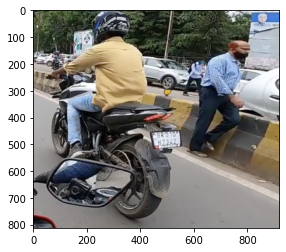

In [16]:
make_predictions("helmet-ds/valid/with_helmet/new75.jpg")

Positives(not helmet): 3
Negatives(helmet): 260


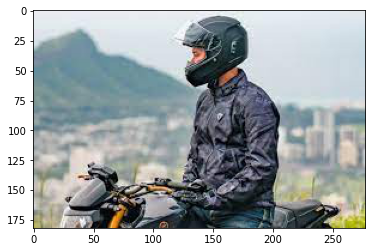

In [25]:
import os
from os import listdir
 
folder_dir = "helmet-ds/train/with_helmet/"

pos=[]
neg=[]

for images in os.listdir(folder_dir):
 
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
        pred = make_predictions(folder_dir+images)
        if pred>0:
            pos.append(pred)
        else:
            neg.append(pred)
print("Positives(not helmet):", len(pos))
print("Negatives(helmet):", len(neg))

In [27]:
imp = keras.models.load_model("helmet_detection")

In [28]:
imp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


array([[-11.084466]], dtype=float32)

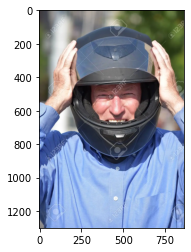

In [34]:
pred = make_predictions("helmet-ds/train/with_helmet/Image (15).jpg")
print(pred)